<a href="https://colab.research.google.com/github/jjininu/Ineuron-project/blob/main/ineuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy  as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 
from sklearn import metrics
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,classification_report,r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import StratifiedKFold,GridSearchCV
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,RandomForestRegressor,GradientBoostingRegressor,AdaBoostClassifier,AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression 
from xgboost import XGBClassifier,XGBRegressor
import pickle

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

In [ ]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [ ]:
def explore(x):
    divider = "="
    print("\n {} \n".format((divider*100))) 
    print("Dataframe Makeup \n") 
    x.info() 
    print("\n {} \n".format((divider*100))) 
    print("Descriptive Statistics \n\n", x.describe()) 
    print("\n {} \n".format((divider*20))) 
    print("Shape of dataframe: {}".format(x.shape)) 
    print("\n {} \n".format((divider*100))) 
    print("Null values \n\n", x.isna().sum()) 
    print("\n {} \n".format((divider*100))) 
    print("Duplicates \n\n", x.duplicated().sum()) 
    return
explore(df) 



Dataframe Makeup 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 26.8+ KB


Descriptive Statistics 

               day       month    year  Temperature          RH          Ws  \
count  244.000000  244.000000   2

From the above high level data analysis:

> Most of the features are of float type.

> The row  data set has 244 recored with 14 features.

> There is one null value in Classes feature.

> There is no duplicate recoreds.











Lets remove the null value since it is only one.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

Lets change the rest of the fetures in to float so that it will be easy to manipulate later.

In [ ]:
df_new = df.iloc[:,:-1].astype(float)
y = df.iloc[:,-1]
df_new

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5
240,27.0,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0
241,28.0,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2
242,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [ ]:
df_new["class"] = y

While looking the Classes features , one can notice that there are 7 catagoties. we are expecting only 2. lets address it.

In [ ]:
df['Classes  '].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [ ]:
df_new["class"].replace(['not fire   ','not fire ','not fire','not fire     ','not fire    '],"Not fire",inplace=True)
df_new["class"].replace(['fire   ', 'fire', 'fire '],"Fire",inplace=True)

In [ ]:
df_new.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,class
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,Not fire
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,Not fire
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,Not fire
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,Not fire
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,Not fire


**Lets try to check if there  imbalance data with respect to the target feature .**


In [ ]:
df_new["class"].value_counts()

array([137, 106])

There is no ignificant difference between the two calagories.

**We can use the month , day and year feature and make a new datetime feature and use it as an index for the recoreds.**


In [ ]:
df_new["month"]=df_new["month"].astype(int)
df_new["day"]=df_new["day"].astype(int)
df_new["year"]=df_new["year"].astype(int)


In [ ]:
df_new["Date"]=df_new["month"].astype(str) + "-" + df_new["day"].astype(str) + "-" + df_new["year"].astype(str)
df_new["Date"]= pd.to_datetime(df_new["Date"])

In [ ]:
df_new.drop(['day','month',"year"],axis = 1,inplace = True)

In [ ]:
df_new = df_new.set_index('Date')

In [ ]:
df_new.head(3)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,class
Date,,,,,,,,,,,
2012-06-01,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,Not fire
2012-06-02,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,Not fire
2012-06-03,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,Not fire


**Perform Descreptive analysis:**


---



---


This will Incluid -

1.   Central tendency 
2.   Destribution 
3.   Depertion








In [ ]:
df_new.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


###Destribution.

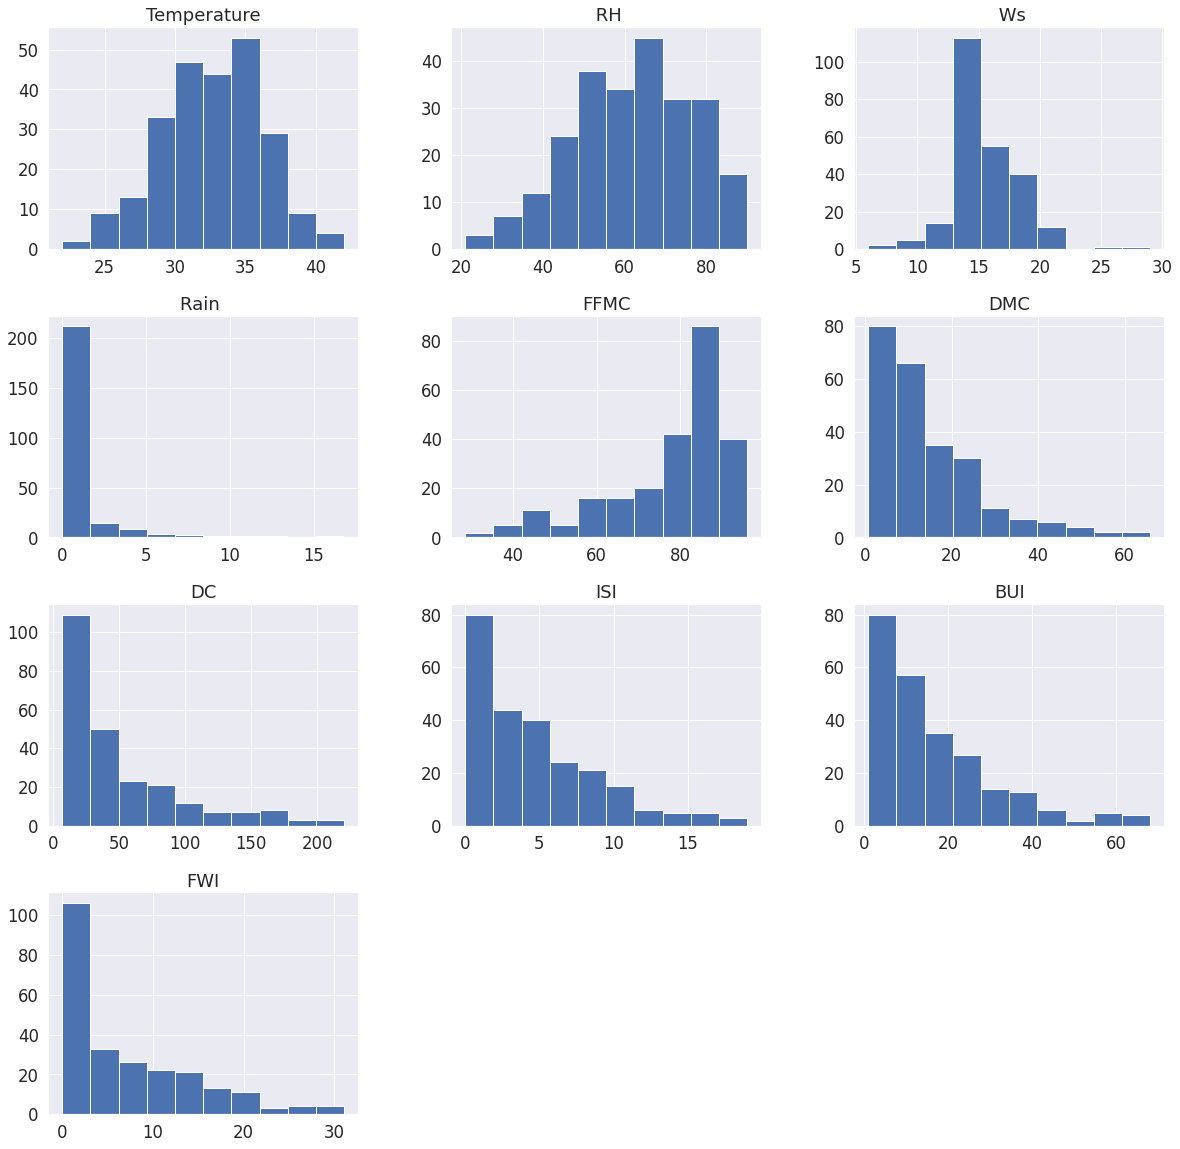

In [ ]:
df_new.hist(figsize = (20,20))
plt.show()

In [ ]:
skewness = df_new.skew(axis= 0)
dic = {'Skewness':[skewness]}
skewness = pd.DataFrame(dic , columns=['Skewness'])
skewness

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,Skewness
0,Temperature -0.191327 RH -0.24279...


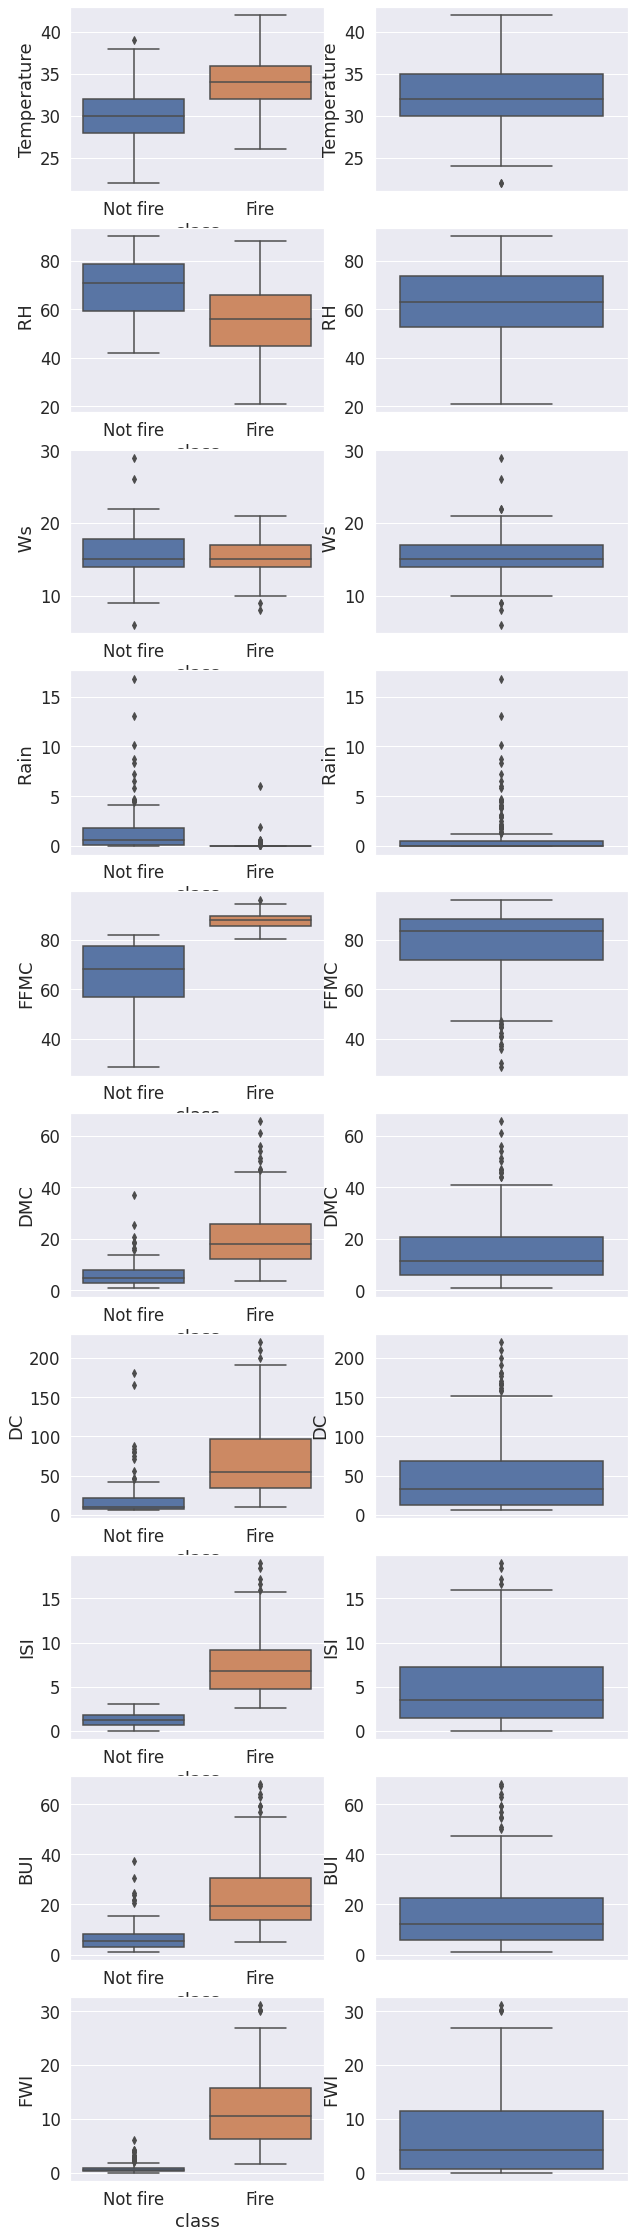

In [ ]:
fig, axes = plt.subplots(10, 2, figsize=(10,40))
sns.boxplot(ax=axes[0, 0], data=df_new, x='class', y='Temperature')
sns.boxplot(ax=axes[0, 1], data=df_new, y='Temperature')
sns.boxplot(ax=axes[1, 0], data=df_new, x='class', y=' RH')
sns.boxplot(ax=axes[1, 1], data=df_new, y=' RH')
sns.boxplot(ax=axes[2, 0], data=df_new, x='class', y=' Ws')
sns.boxplot(ax=axes[2, 1], data=df_new, y=' Ws')
sns.boxplot(ax=axes[3, 0], data=df_new, x='class', y='Rain ' )
sns.boxplot(ax=axes[3, 1], data=df_new, y='Rain ')
sns.boxplot(ax=axes[4, 0], data=df_new, x='class', y='FFMC')
sns.boxplot(ax=axes[4, 1], data=df_new, y='FFMC')
sns.boxplot(ax=axes[5, 0], data=df_new, x='class', y= 'DMC')
sns.boxplot(ax=axes[5, 1], data=df_new, y='DMC')
sns.boxplot(ax=axes[6, 0], data=df_new, x='class', y='DC')
sns.boxplot(ax=axes[6, 1], data=df_new, y='DC')
sns.boxplot(ax=axes[7, 0], data=df_new, x='class', y='ISI')
sns.boxplot(ax=axes[7, 1], data=df_new, y='ISI')
sns.boxplot(ax=axes[8, 0], data=df_new, x='class', y='BUI' )
sns.boxplot(ax=axes[8, 1], data=df_new, y='BUI')
sns.boxplot(ax=axes[9, 0], data=df_new, x='class', y='FWI')
sns.boxplot(ax=axes[9, 1], data=df_new, y='FWI')



**Perform correlation relationship.**

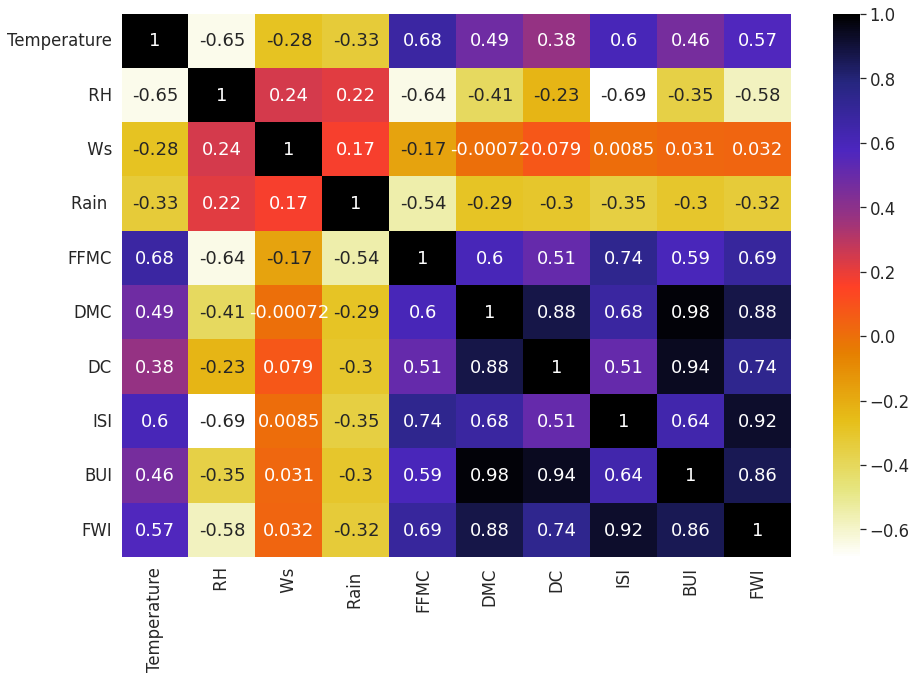

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_new.corr(),annot=True,cmap = plt.cm.CMRmap_r)

In [ ]:
corr_pairs = df_new.corr().unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
corr_pairs = pd.DataFrame(sorted_pairs)
corr_pairs = corr_pairs.reset_index()
corr_pairs.columns = ['Feature 1','Feature 2','Correlation']
corr_pairs = corr_pairs[corr_pairs['Correlation'] != 1]
corr_pairs.sort_values(by=['Correlation'],ascending= False).drop_duplicates(subset='Correlation').head(10)

,Feature 1,Feature 2,Correlation
89,BUI,DMC,0.982248
87,BUI,DC,0.941988
85,FWI,ISI,0.922895
83,DMC,DC,0.875925
81,FWI,DMC,0.875864
79,BUI,FWI,0.857973
77,FFMC,ISI,0.740007
75,DC,FWI,0.739521
73,FWI,FFMC,0.691132
71,ISI,DMC,0.680454


From the above statistical analysis:

•	Most of the features are not normally distribute. Which is also supported by the findings from the skewness table.

•	There are outliers in most of the features.

•	There is a significant Multicollinearity among some of the features.

Due to the above facts with respect to the data set and putting its small size in to consideration. We will be more focus on tree based models while developing our model. 
Even if there are moltiple features with significant corrilatin to each other We will also remove BUI feature since it is the most highly correlated with most of the other features.We are going to drop and use BUI for the regression questions.

In [ ]:
df_bui = df_new.copy()

In [143]:
df_new.drop("BUI",axis = 1, inplace=True)


KeyError: ignored

In [144]:
df_bui.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,class
Date,,,,,,,,,,,
2012-06-01,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,Not fire
2012-06-02,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,Not fire
2012-06-03,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,Not fire
2012-06-04,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,Not fire
2012-06-05,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,Not fire


# Modeling


In [ ]:
df_new.columns

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'FWI',
       'class'],
      dtype='object')

In [149]:
df_new["class"] =df_new["class"].replace("Not fire",0)
df_bui["class"] =df_bui["class"].replace("Not fire",0)

In [148]:
df_new["class"] =df_new["class"].replace('Fire',1)
df_bui["class"] =df_bui["class"].replace('Fire',1)

In [150]:
x_classifier = df_new.iloc[:,:-1]
y_classifier = df_new.iloc[:,-1]
x_regressor = df_bui[['Temperature', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'FWI','class']]
y_regressor= df_bui.iloc[:,8]
x_regressor


,Temperature,Ws,Rain,FFMC,DMC,DC,ISI,FWI,class
Date,,,,,,,,,
2012-06-01,29.0,18.0,0.0,65.7,3.4,7.6,1.3,0.5,0
2012-06-02,29.0,13.0,1.3,64.4,4.1,7.6,1.0,0.4,0
2012-06-03,26.0,22.0,13.1,47.1,2.5,7.1,0.3,0.1,0
2012-06-04,25.0,13.0,2.5,28.6,1.3,6.9,0.0,0.0,0
2012-06-05,27.0,16.0,0.0,64.8,3.0,14.2,1.2,0.5,0
...,...,...,...,...,...,...,...,...,...
2012-09-26,30.0,14.0,0.0,85.4,16.0,44.5,4.5,6.5,1
2012-09-27,28.0,15.0,4.4,41.1,6.5,8.0,0.1,0.0,0
2012-09-28,27.0,29.0,0.5,45.9,3.5,7.9,0.4,0.2,0


In [151]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(x_classifier, y_classifier, test_size=0.25, random_state=42,shuffle = True)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(x_regressor, y_regressor, test_size=0.25, random_state=42,shuffle = True)


**Let's train different models with their default configurations and Compare their performance using pipe function.**


In [152]:
ss = StandardScaler()
pipe_knn = Pipeline([('ss',StandardScaler()),
             ('knn',KNeighborsClassifier(2))])
pipe_svm = Pipeline([('ss',StandardScaler()),
             ('svm',SVC())])
pipe_rf = Pipeline([('ss',StandardScaler()),
             ('rf',RandomForestClassifier())])
pipe_gd = Pipeline([('ss',StandardScaler()),
             ('gb',GradientBoostingClassifier())])
pipe_xgb = Pipeline([('ss',StandardScaler()),
             ('xgb',XGBClassifier())])
pipe_ada = Pipeline([('ss',StandardScaler()),
             ('ada',AdaBoostClassifier())])
pipe_rfr = Pipeline([('ss',StandardScaler()),
             ('rfr',RandomForestRegressor())])
pipe_ada_r = Pipeline([('ss',StandardScaler()),
             ('ada',AdaBoostRegressor())])
pipe_xgb_r  = Pipeline([('ss',StandardScaler()),
             ('ada',XGBRegressor())])
pipeline_list_class = [pipe_knn,pipe_svm,pipe_rf,pipe_gd,pipe_xgb,pipe_ada]
pipe_dict_class = {0:'KNeighborsClassifier',1:'SVC',2:'RandomForestClassifier',
             3:'GradientBoostingClassifier',4:'XGBClassifier',
             5:'AdaBoostClassifier'}
pipeline_list_regressor = [pipe_rfr,pipe_ada_r,pipe_xgb_r]
pipe_dict_regressor = {0: "RandomForestRegressor",1:"AdaBoostregressor",2:"XGBRegressor"}


In [153]:
hyperparameter_Randomforest = {'max_depth':[None,4,6,8,10,12,15,20], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'max_features':['auto','sqrt','log2']}
hyperparameter_GradientBoost = {"n_estimators":[5,50,250,500],
                        "max_depth":[1,3,5,7,9],
                        "learning_rate":[0.01,0.1,1,10,100]}
hyperparameter_KNN = {'n_neighbors' : [2],
                      'weights' : ['uniform','distance'],
                       'metric' : ['minkowski','euclidean','manhattan']}
hyperparameter_SVM= {'C': [0.1, 1, 10, 100, 1000],
                      'gamma': [1, 0.1, 1e-2, 1e-3, 1e-4, 1e-5],
                      'kernel': ['rbf','sigmoid']}
              

                          
hyperparameter_xgb = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                      'min_child_weight': np.arange(0.0001, 0.5, 0.001),
                      'gamma': np.arange(0.0,40.0,0.005),
                      'learning_rate': np.arange(0.0005,0.3,0.0005),
                      'subsample': np.arange(0.01,1.0,0.01)}

In [154]:
for i in pipeline_list_class:
  i.fit(X_train_c,y_train_c)
for i,model in  enumerate(pipeline_list_class):
  predict_train = model.predict(X_train_c)
  predict = model.predict(X_test_c)
  print ("===================    {}    =========================================".format(pipe_dict_class[i]))
  print('{} train accuracy:/n{},and test accuracy:/n{}'.format(pipe_dict_class[i],classification_report(y_train_c,predict_train),classification_report(y_test_c,predict)))
  print('----------------------------------------------------------------------------------')
  print('Confusion matrix \n{}'.format (pd.crosstab(y_test_c,predict)))
  print('==================================================================================')




===================    KNeighborsClassifier    =========================================
KNeighborsClassifier train accuracy:/n              precision    recall  f1-score   support

           0       0.89      1.00      0.94        82
           1       1.00      0.90      0.95       100

    accuracy                           0.95       182
   macro avg       0.95      0.95      0.94       182
weighted avg       0.95      0.95      0.95       182
,and test accuracy:/n              precision    recall  f1-score   support

           0       0.79      0.96      0.87        24
           1       0.97      0.84      0.90        37

    accuracy                           0.89        61
   macro avg       0.88      0.90      0.88        61
weighted avg       0.90      0.89      0.89        61

----------------------------------------------------------------------------------
Confusion matrix 
col_0   0   1
class        
0      23   1
1       6  31
===================    SVC    ============

In [136]:
rfc  = RandomForestClassifier()
model_cls = rfc.fit(X_train_c,y_train_c)

In [155]:
X_test_r=X_test_r.replace(["Fire","Not fire"], [1,0])
X_train_r=X_train_r.replace(["Fire","Not fire"], [1,0])

In [156]:
for i in pipeline_list_regressor:
  i.fit(X_train_r,y_train_r)
for i,model1 in  enumerate(pipeline_list_regressor):
  predict_train = model1.predict(X_train_r)
  predict = model1.predict(X_test_r)
  print ("===================     Regression    =========================================")
  MSE_training = mean_squared_error(y_train_r,predict_train)
  Mean_square_error_testing = mean_squared_error(y_test_r,predict)
  R_Squared__training = r2_score(y_train_r,predict_train)
  R_Squared_testing = r2_score(y_train_r,predict_train)
  print(pipe_dict_regressor[i],"MSE training data =" , MSE_training, "MSE for test data = ",Mean_square_error_testing,"R square for training= ",R_Squared__training,"R square for test data",R_Squared_testing)
  #df = pd.DataFrame({"Models":["RandomForestRegressor","AdaBoostregressor","XGBRegressor"]},{"Mean_square_error_training":MSE_training},
                    #{"Mean_square_error_testing":Mean_square_error_testing},{"R_Squared__training":R_Squared__training},{"R_Squared_testing":R_Squared_testing})
  print('==================================================================================')


[23:13:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
===================     Regression    =========================================
RandomForestRegressor MSE training data = 0.42744616483516595 MSE for test data =  3.8647434918032806 R square for training=  0.9979758065566502 R square for test data 0.9979758065566502
===================     Regression    =========================================
AdaBoostregressor MSE training data = 2.7507524211274963 MSE for test data =  9.277378597210514 R square for training=  0.9869736694976032 R square for test data 0.9869736694976032
===================     Regression    =========================================
XGBRegressor MSE training data = 0.06227920913889671 MSE for test data =  4.928220697209951 R square for training=  0.9997050735807992 R square for test data 0.9997050735807992


In [157]:
rfr  = RandomForestRegressor()
model_reg = rfr.fit(X_train_r,y_train_r)

In [158]:
pickle.dump(model_cls, open('model_cls.pkl','wb'))
pickle.dump(model_reg, open('model_reg.pkl','wb'))


In [159]:
X_train_ss = ss.fit_transform(X_train_c)
X_test_ss = ss.transform(X_test_c)


In [167]:
plt.figure(figsize=(20,20))
cv = StratifiedKFold(n_splits=5, random_state=666, shuffle=True)
def classification_models(estimator,param_grid):
  gsc = GridSearchCV(estimator = estimator ,param_grid = param_grid ,cv=5, n_jobs=1)
  model = gsc.fit(X_train_ss,y_train_c)
  best_estimator = model.best_estimator_
  predict_y_train = best_estimator.predict(X_train_ss)
  predict = best_estimator.predict(X_test_ss)
  auc = round(metrics.roc_auc_score(y_test_c,predict),2)
  false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test_c,predict)
  print('==============================={}=========================================='.format(best_estimator))

  print('{} \n Accuracy\n{} AUC score {}'.format (estimator,classification_report(y_test_c,predict),auc))
  print('==================================================================================')
  print('Accuracy score(test): {} \nAccuracy score(train): {}'.format (round(accuracy_score(y_test_c,predict),3),round(accuracy_score(y_train_c,predict_y_train),3)))
  print('==================================================================================')
  print('Confusion matrix \n{}'.format (pd.crosstab(y_test_c,predict)))
  print('==================================================================================')


<Figure size 1440x1440 with 0 Axes>

In [168]:
classification_models(KNeighborsClassifier(),hyperparameter_KNN)
classification_models(RandomForestClassifier(),hyperparameter_Randomforest)
classification_models(GradientBoostingClassifier(),hyperparameter_GradientBoost)
classification_models(SVC(),hyperparameter_SVM)


===============================KNeighborsClassifier(metric='manhattan', n_neighbors=2)==========================================
KNeighborsClassifier() 
 Accuracy
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        24
           1       0.97      0.89      0.93        37

    accuracy                           0.92        61
   macro avg       0.91      0.93      0.92        61
weighted avg       0.92      0.92      0.92        61
 AUC score 0.93
Accuracy score(test): 0.918 
Accuracy score(train): 0.962
Confusion matrix 
col_0   0   1
class        
0      23   1
1       4  33
===============================RandomForestClassifier(max_features='sqrt', min_samples_leaf=2)==========================================
RandomForestClassifier() 
 Accuracy
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.97      0.99        37

    accuracy              

In [164]:
X_train_c.columns

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI',
       'FWI'],
      dtype='object')